# 数据科学入门1.6：简单时间序列预测与总结

## Introduction to Data Science Part1.6: Time Series and Summary
## 时间序列与ARIMA模型

刚才我们都是用几个independent variable x来预测dependent variable y。
x和y都属于一次观测。如果我们只有一个变量就是y本身，然后不停的一次接一次的观测y，
得到一个序列，然后我们想要预测未来的y值怎么玩呢？例如我们有一支股票他几个月以来每一天的收盘价，
我们想预测明天的股票价格。

首先我们定义一下这个模型。对于一个随机事件，
我们每隔一段时间观测一次，或者每隔一段时间按顺序发生的一个随机事件，
我们叫他随机序列。对于第t次观测值，我叫做 $y_t$ ，前一次就叫做 $y_{t-1}$ ，
前一次的前一次叫做 $y_{t-2}$ ，那么 $y_{t-k}$ 能够理解了吧。

我们首先搞个简单的模型叫线性自回归模型（auto-regressive model）

$$
y_t=c+\sum_{i=1}^{k}\beta_i*y_{t-i}+\epsilon
$$

这个能看懂吧，就是下一个y的观测值=之前k次的观测值的线性组合+上一个随机的误差。
这个模型你想想你用我们之前学的知识可以做吧。这个就是表现了未来的值，和历史值有关。

ok我们现在学一个更加复杂也是实际中用的更多的一个模型叫做ARIMA
（auto-regeressive integrated moving average）。
我这不是数学、也不是统计学课，我不讲太复杂，但是我觉得基本的原理还是要熟悉一下：

一个ARIMA模型的表达式是(我移动了一下你们看着简单点)：

$$
y_t^d=c+\sum_{i=1}^{p}\beta_iL^iy_t^d+\sum_{i=1}^{q}\theta_iL^i\epsilon_t
$$

先讲几个算子：
1. lag算子：超简单就是 $L^iy_t=y_{t-i}$
2. d差分算子：$y_t^d$ y的d阶差分，d=1是 就是 $y_t-y_{t-1}$，
d是2的时候就是 $(y_t-y_{t-1})-(y_{t-1}-y_{t-1})$，简单吧。

I是integrated的意思，就是这个模型是加起来用的，
他预测的是y的差分也就是y的变化量，并不直接是y。
为什么这么做呢，他是为了让模型不受trend和seasonal分量的影响。
trend就是数据在时间上有个趋势，例如房间年年涨，这种。
seasonal就是周期新的分量，例如每年夏天电费都素会比其他季节高。
去掉了他们的影响，我们的模型才不受时间的影响，不会说上半年能用下半年就不能用了。
这个就叫做模型是Stationary的。

前面和y有关的就是各个说过的AR模型。

那MA是什么意思呢？Moving Average的意思就是
后面$\left(1+\sum_{i=1}^{q}\theta_iL^i\right)\epsilon_t$
这一项代表一个moving average模型预测与之前观测数据误差的一个线性组合。
它代表了一个未知扰动量对未来值得影响。

这个ARIMA模型实际上最早是来自于金融领域，说白了就是为了预测股票价格的。
我们再看看AR，他表示的就是前几天得行情与明天行情得关系，前几天的行情，
是我们可以观测得量。同时后面MA得部分，代表一个扰动，原文叫做“shock”，
这一部分是我们无法直接观测的，只能通过他对y得印象来推测。例如突然发证了地震，
或者病毒疫情导致股票下跌，在ARIMA模型模型中，是没有地震和疫情这个变量输入的，
但是他们的影响在MA那一部分通过前几次的误差得线性组合被考虑了。

为什么搞得这么纠结，当然是应为这样一般情况下更准一些，一本模型越复杂拟合的越好，
你要记住的是p，d，q这3个超参数(我们后面会讲什么是超参数)。p是AR部分阶数，就是和过去几次观测有关，
q是MA部分的阶数，就是和过去几次扰动有关，d是差分阶数，我们一般=1就可以了。

好的我们做个例子，如我们  
>exp7 这里给出谷歌5个月的股价，我们来预测看看。

In [1]:
import numpy as np
import pandas as pd

exp_7 = pd.read_excel('exp7.xlsx')
exp_7.head()

,date,price
0,2/7/2005,196.03
1,2/8/2005,198.64
2,2/9/2005,191.58
3,2/10/2005,187.98
4,2/11/2005,187.40


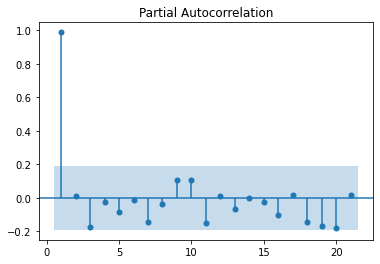

In [2]:
from statsmodels.graphics import tsaplots
from matplotlib import pyplot as plt

tsaplots.plot_pacf(exp_7['price'], zero=False)  # zero=False即不画与当前的关系

plt.show()

首先我们先用plot_pacf()这个函数看看，
当前股价和过去几天的股价有没有什么关系，
可以看到t-1和今天关系很明显，后面的就不是很明显了，
所以我们模型的p可以选1-2就够了，d一般都是选1，这里我们选了2因为好看，
q的话和p选差不多一般也不错

D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                   90
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -256.655
Date:                Tue, 03 May 2022   AIC                            523.310
Time:                        20:40:49   BIC                            535.697
Sample:                             0   HQIC                           528.300
                                 - 90                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9099      0.106     -8.580      0.000      -1.118      -0.702
ar.L2          0.0901      0.098      0.918      0.359      -0.102       0.282
ma.L1          0.0515      0.776      0.066      0.947      -1.469       1.572
ma.L2         -0.9465      0.723     -1.310      0.190      -2.363       0.470
sigma2        19.2211     15.004      1.281      0.200     -10.185      48.628
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                11.80
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               3.51   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

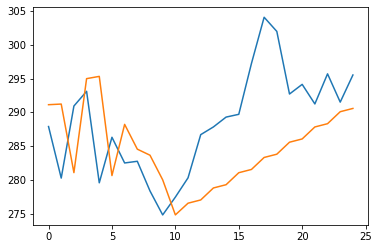

In [3]:
from statsmodels.tsa.arima.model import ARIMA
X = exp_7['price'][:90]  # 取前90天为训练集


model = ARIMA(X, order=(2,2,2))
res = model.fit()
# 这里predict有两个参数，start和stop，不传参数默认是预测你训练的值
# 这里我们训练集[0, 90), 测试集[90, 104]
# 此外还有一个forecast方法，只有1个参数即步长steps
# forecast方法就是预测从你结束的那一点往后steps长度的值
preds = res.predict(0, 104)
plt.plot(exp_7['price'].values[80:])
plt.plot(preds.values[80:])
res.summary()


结果看起来还凑活，但还是不太好看对吧。
像股价预测这种我们没有必要用过去一段时间去预测未来一段时间的，
可以试试只预测未来一天的，且每天用新的观测值来重新fit模型。

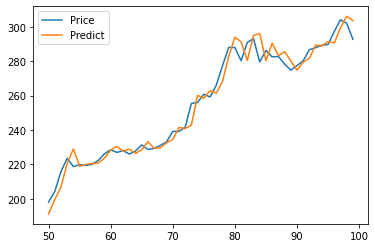

50    191.208168
51    199.535497
52    206.751748
53    220.651450
54    229.028917
55    218.905046
56    220.007995
57    220.484336
58    220.730356
59    223.676545
60    228.303522
61    230.522739
62    227.748424
63    228.828764
64    226.462395
65    228.505862
66    233.136497
67    229.342177
68    229.577665
69    232.599914
70    234.479717
71    241.491358
72    240.818193
73    242.871176
74    260.148333
75    258.489096
76    262.906351
77    261.410058
78    268.116293
79    282.739638
80    293.979789
81    291.268829
82    280.473586
83    295.007263
84    296.117771
85    280.341802
86    290.558206
87    283.220948
88    285.583252
89    280.115987
90    274.804834
91    279.496994
92    281.696114
93    289.353372
94    288.791074
95    291.447821
96    290.571706
97    299.541714
98    306.137089
99    303.622877
dtype: float64

In [4]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

# 这里的warnings单纯为了过滤不必要的warning，输出结果清爽一些，大家忽略
def rolling_predict_arima(start, end):
    """
    To predict next day and update the model with observation.
    :params start: point start to predict
    :params end: point end to predict
    """
    prediction = exp_7['price'][:start]
    for i in range(start, end):
        X = exp_7['price'][:i]
        model = ARIMA(X, order=(2, 2, 2))
        res = model.fit()
        prediction = prediction.append(res.forecast(1))
    plt.plot(exp_7['price'][start:end], label='Price')
    plt.plot(prediction[start:end], label='Predict')
    plt.legend()
    plt.show()
    return prediction[start:end]
rolling_predict_arima(50, 100)

## VARM 模型 Vector Autoregression Models

刚刚讲的那个ARIMA模型，它适用的是单个变量的数据，
有时候一个时间序列它包含了多个变量怎么办呢？

例如下面这个例子：

>exp8: 他给出了一个风力发电厂几年来每10分钟一次的数据，
包括风速风向、理论课发电量和实际发电量，4个变量。
假设我们想预测实际发电量，实际上另外3个变量对他也是有用的，
实际上预测某一个变量，其他的可能都用得上。
其实和之前的auto regression模型基本上没区别是不过换成了向量，
协议这种叫Vector auto regression（VAR），
公式和之前是一样的，就是认为Y，和参数都是向量就行：

$$
Y=C+\sum_{i=1}^{p}B_i*L^iY+E
$$

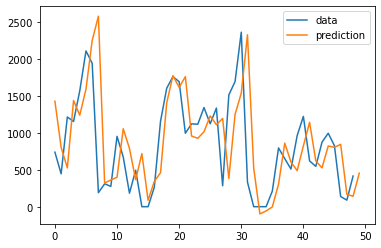

In [9]:
import numpy as np
import pandas as pd
from statsmodels.tsa.api import VAR
exp_8 = pd.read_csv('exp8.csv').iloc[:, 1:]
exp_8 = exp_8[::6]


def rolling_predict_var(start, end, step):
    """
    To predict next day and update the model with observation.
    :params start: point start to predict
    :params end: point end to predict
    """
    prediction = exp_8[:start].values
    for i in range(start, end, step):
        X = exp_8[:i].values
        model = VAR(X)
        res = model.fit()
        prediction = np.vstack((prediction, res.forecast(X, step)))
    plt.plot(X[start:end, 0], label='data')
    plt.plot(prediction[start:end, 0], label='prediction')
    plt.legend()
    plt.show()
    return prediction[start:end]
prediction = rolling_predict_var(50, 100, 1)
